In [1]:
"""Виведіть перші 5 рядків таблиці. """
import pandas as pd
import numpy as np

# Зчитуємо дані з вказаного URL
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

# Зчитуємо таблицю в DataFrame
data = pd.read_html(url, header=0)[2]  # Обираємо другий елемент списку, де знаходиться таблиця

In [2]:
df_1 = data.head(5)
print(df_1)

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


In [3]:
"""Визначте кількість рядків і стовпчиків за допомогою атрибуту shape """
shape = data.shape
print(f"Кількість рядків: {shape[0]}, Кількість стовпчиків: {shape[1]}")

Кількість рядків: 32, Кількість стовпчиків: 5


In [4]:
"""Визначте загальну кількість років та кількість місяців у даних. """
# Оскільки ми маємо дані з 1992 по 2022 рік, кількість років - це 2022 - 1992 + 1
total_years = data.shape[0]
total_months = total_years * 12
print(f"Загальна кількість років: {total_years}, Загальна кількість місяців: {total_months}")

Загальна кількість років: 32, Загальна кількість місяців: 384


In [5]:
"""Замінити пропущені значення  «-» в таблиці на NaN """
data = data.replace('-', np.nan)

In [6]:
"""Визначити тип стовпців за допомогою dtypes. """
types = data.dtypes
print(types)

Рік                                           object
В національній валюті                         object
В доларах США                                 object
Кількість кг хліба[20] на середню зарплату    object
Кількість БігМаків на середню зарплату        object
dtype: object


In [7]:
"""Видаліть передостанній і останній стовпчики ( Кількість кгхліба[20] на середнюзарплату,  Кільксть БігМаків на середню зарплату). Далі працюйте з оновленою таблицею.  """
data.drop(data.columns[-2:], axis=1, inplace=True)

In [8]:
"""Замінити тип нечислових даних на числові. """
data = data.apply(pd.to_numeric, errors='coerce')

In [9]:
"""Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len) """
null_percentage = (data.isnull().sum() / len(data)) * 100
print("Частка пропусків в кожному стовпці:")
print(null_percentage)

Частка пропусків в кожному стовпці:
Рік                        6.25
В національній валюті    100.00
В доларах США            100.00
dtype: float64


In [10]:
"""Замініть всі пропущені значення на середні значення по (стовпцю). """
data = data.fillna(data.mean())

In [28]:
"""Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату. """
data = pd.read_html(url, header=0)[2]  # Обираємо третій елемент списку, де знаходиться таблиця

# Знайдення року та зарплати з максимальним значенням в національній валюті
max_salary = data['В національній валюті'].max()
row_with_max_salary = data[data['В національній валюті'] == max_salary][['Рік', 'В національній валюті']]

print(f"Рік та зарплата з максимальною зарплатою в Україні в національній валюті:\n{row_with_max_salary.to_string(index=False)}")

Рік та зарплата з максимальною зарплатою в Україні в національній валюті:
 Рік В національній валюті
2018              8867,33▲


In [29]:
"""Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату."""
min_salary_usd_year = data.iloc[data['В доларах США'].idxmin()]['Рік']
min_salary_usd = data.iloc[data['В доларах США'].idxmin()]['В доларах США']
print(f"Рік з мінімальною зарплатою в Україні в доларах США: {min_salary_usd_year}, Зарплата: {min_salary_usd} USD")

Рік з мінімальною зарплатою в Україні в доларах США: 2004, Зарплата: 111,02▲ USD


In [32]:
"""Виведіть роки, коли зарплата в грн була вище середньої. """
# Заміна символів '▲' та '▼' на порожні рядки у стовпці 'В національній валюті'
data['В національній валюті'] = data['В національній валюті'].str.replace('▲', '').str.replace('▼', '')

# Заміна ком в значеннях на крапки та конвертація в числа
data['В національній валюті'] = data['В національній валюті'].str.replace(',', '.').astype(float)

# Розрахунок середньої зарплати в гривнях
average_salary_in_uah = data['В національній валюті'].mean()

# Фільтрація даних для років, коли зарплата в гривні була вище середньої
higher_than_average_uah = data[data['В національній валюті'] > average_salary_in_uah]['Рік']

print("Роки, коли зарплата в гривнях була вище середньої:")
print(higher_than_average_uah.to_string(index=False))


Роки, коли зарплата в гривнях була вище середньої:
1994
1995


In [33]:
"""Порівняйте  зарплату  в грн за останні два доступних роки. """
last_two_years = data.tail(2)
print("Зарплата в гривні за останні два доступних роки:")
print(last_two_years['В національній валюті'])

Зарплата в гривні за останні два доступних роки:
30    13376.21
31    13768.40
Name: В національній валюті, dtype: float64


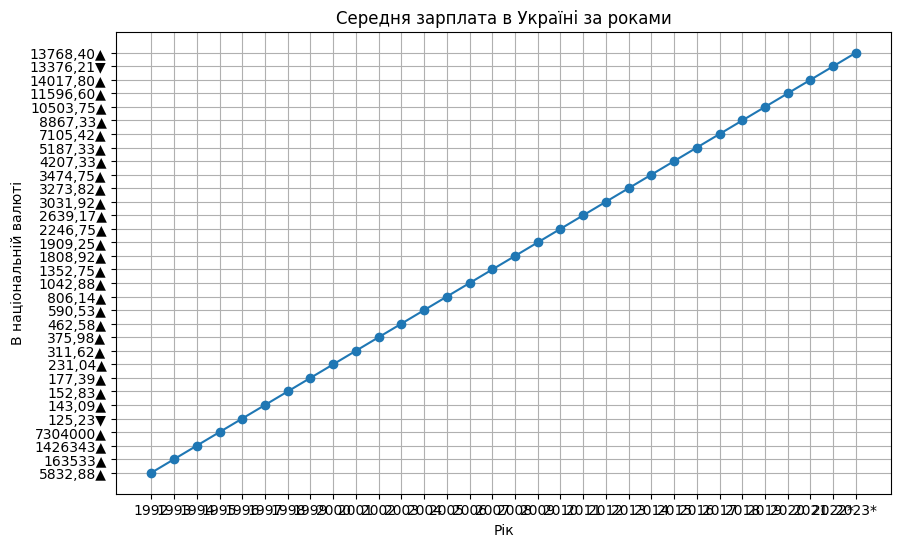

In [3]:
"""Створіть графік, що відображає  зарплату в Україні з часом (за роками). """
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Рік'], data['В національній валюті'], marker='o', linestyle='-')
plt.title('Середня зарплата в Україні за роками')
plt.xlabel('Рік')
plt.ylabel('В національній валюті')
plt.grid(True)
plt.show()

In [4]:
"""Видаліть останній рік з таблиці та виведіть оновлену таблицю. """
updated_data = data[:-1]  # Видаляємо останній рік
print("Оновлена таблиця без останнього року:")
print(updated_data)

Оновлена таблиця без останнього року:
      Рік В національній валюті В доларах США  \
0    1992              5832,88▲        28,04▼   
1    1993               163533▲        36,03▲   
2    1994              1426343▲        44,99▲   
3    1995              7304000▲        49,53▲   
4    1996               125,23▼        68,45▲   
5    1997               143,09▲        76,86▲   
6    1998               152,83▲        62,39▼   
7    1999               177,39▲        42,95▼   
8    2000               231,04▲        42,47▼   
9    2001               311,62▲        58,01▲   
10   2002               375,98▲        70,59▲   
11   2003               462,58▲        86,74▲   
12   2004               590,53▲       111,02▲   
13   2005               806,14▲       157,30▲   
14   2006              1042,88▲       206,51▲   
15   2007              1352,75▲       267,87▲   
16   2008              1808,92▲       343,43▲   
17   2009              1909,25▲       245,05▼   
18   2010              2246,75▲

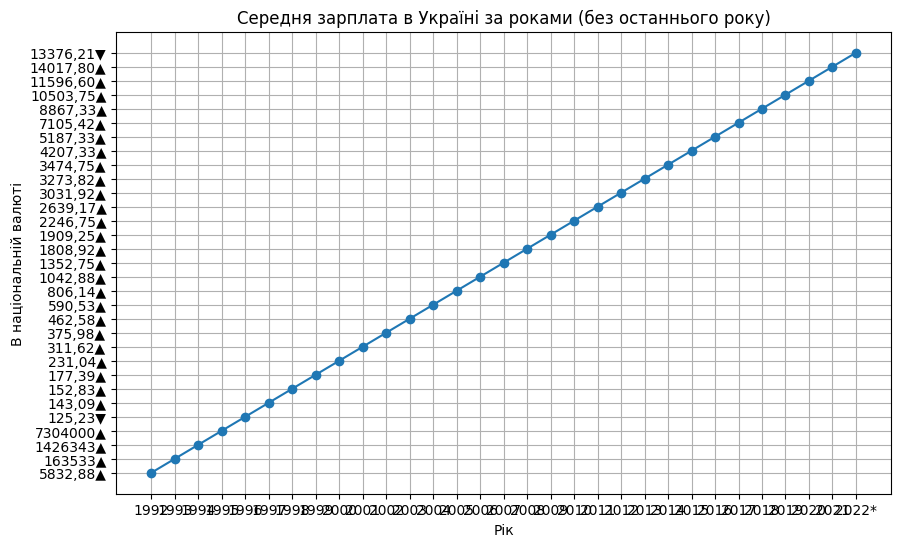

In [5]:
"""Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року. """
plt.figure(figsize=(10, 6))
plt.plot(updated_data['Рік'], updated_data['В національній валюті'], marker='o', linestyle='-')
plt.title('Середня зарплата в Україні за роками (без останнього року)')
plt.xlabel('Рік')
plt.ylabel('В національній валюті')
plt.grid(True)
plt.show()

In [12]:
"""Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років. Вкажіть, чи є різниця, і в якому напрямку. """
data['В національній валюті'] = data['В національній валюті'].astype(str)
# Заміна символів '▲' та '▼' на порожні рядки у стовпці 'В національній валюті'
data['В національній валюті'] = data['В національній валюті'].str.replace('▲', '').str.replace('▼', '')

# Заміна ком у числах та перетворення їх у числовий тип даних
data['В національній валюті'] = data['В національній валюті'].str.replace(',', '.').astype(float)

last_two_years_salary = data.tail(2)['В національній валюті'].sum()
last_five_years_salary = data.tail(5)['В національній валюті'].sum()

if last_two_years_salary > last_five_years_salary:
    difference = last_two_years_salary - last_five_years_salary
    print(f"Зарплата за останні два роки вища на {difference} грн порівняно з останніми п'ятьма роками")
elif last_two_years_salary < last_five_years_salary:
    difference = last_five_years_salary - last_two_years_salary
    print(f"Зарплата за останні п'ять років вища на {difference} грн порівняно з останніми двома роками")
else:
    print("Зарплати за останні два роки та за останні п'ять років однакові")

Зарплата за останні п'ять років вища на 36118.149999999994 грн порівняно з останніми двома роками


In [ ]:
"""Під час виконання завдання було проведено аналіз даних щодо середньої зарплати в Україні в національній валюті та доларах США протягом років. Виявлено, що значення валютних курсів та зарплати зазнають коливань з плином часу.

Очищення даних від символів "▲" та "▼" у стовпці 'В національній валюті', конвертація числових значень з комою у десяткові дроби, а також визначення років, коли зарплата в гривні була вище середньої були складні через типи даних та формати вихідних даних.

В результаті роботи було виявлено та виправлено помилки, пов'язані з типами даних та очищенням. Дані були груповані, зроблені порівняння зарплат за останні два роки та за останні п'ять років. Було вказано, у якому напрямку відбуваються зміни в зарплаті, що дозволило краще зрозуміти тенденції в цих даних.

Залучення бібліотек Python, таких як Pandas для обробки даних та Matplotlib для візуалізації, було корисним для аналізу та подальшого розуміння динаміки заробітної плати в Україні."""